In [1]:
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [16]:
#import avacado data files
df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/Electon_Portugal.csv")

In [17]:
df.head(2)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,prevotersPercentage,presubscribedVoters,pretotalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,10/6/2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743.0,428546.0,PS,0.0,38.29,40.22,147993.0,94.0,106.0
1,0,10/6/2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743.0,428546.0,PPDPSD,0.0,33.28,34.95,128624.0,81.0,77.0


In [18]:
# replace NaN values

import numpy as np

df['TimeElapsed'].replace(np.NaN , df['TimeElapsed'].mean,inplace=True)
df['totalMandates'].replace(np.NaN , df['totalMandates'].mean,inplace=True)
df['availableMandates'].replace(np.NaN , df['availableMandates'].mean,inplace=True)
df['numParishes'].replace(np.NaN , df['numParishes'].mean,inplace=True)
df['numParishesApproved'].replace(np.NaN , df['numParishesApproved'].mean,inplace=True)
df['blankVotes'].replace(np.NaN , df['blankVotes'].mean,inplace=True)
df['blankVotesPercentage'].replace(np.NaN , df['blankVotesPercentage'].mean,inplace=True)
df['nullVotes'].replace(np.NaN , df['nullVotes'].mean,inplace=True)
df['validVotesPercentage'].replace(np.NaN , df['validVotesPercentage'].mean,inplace=True)
df['nullVotesPercentage'].replace(np.NaN , df['nullVotesPercentage'].mean,inplace=True)
df['votersPercentage'].replace(np.NaN , df['votersPercentage'].mean,inplace=True)
df['pretotalVoters'].replace(np.NaN , df['pretotalVoters'].mean,inplace=True)


In [19]:
list(df.columns.values) 

['TimeElapsed',
 'time',
 'territoryName',
 'totalMandates',
 'availableMandates',
 'numParishes',
 'numParishesApproved',
 'blankVotes',
 'blankVotesPercentage',
 'nullVotes',
 'nullVotesPercentage',
 'votersPercentage',
 'subscribedVoters',
 'totalVoters',
 'preblankVotes',
 'preblankVotesPercentage',
 'prenullVotes',
 'prenullVotesPercentage',
 'prevotersPercentage',
 'presubscribedVoters',
 'pretotalVoters',
 'Party',
 'Mandates',
 'Percentage',
 'validVotesPercentage',
 'Votes',
 'Hondt',
 'FinalMandates']

In [20]:
df.head(2)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,prevotersPercentage,presubscribedVoters,pretotalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,10/6/2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743.0,428546,PS,0.0,38.29,40.22,147993.0,94.0,106.0
1,0,10/6/2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743.0,428546,PPDPSD,0.0,33.28,34.95,128624.0,81.0,77.0


In [21]:
# Checking dataset data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19492 entries, 0 to 19491
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeElapsed              19492 non-null  int64  
 1   time                     19492 non-null  object 
 2   territoryName            19492 non-null  object 
 3   totalMandates            19492 non-null  int64  
 4   availableMandates        19492 non-null  int64  
 5   numParishes              19492 non-null  int64  
 6   numParishesApproved      19492 non-null  int64  
 7   blankVotes               19492 non-null  int64  
 8   blankVotesPercentage     19492 non-null  float64
 9   nullVotes                19492 non-null  int64  
 10  nullVotesPercentage      19492 non-null  float64
 11  votersPercentage         19492 non-null  float64
 12  subscribedVoters         19492 non-null  object 
 13  totalVoters              19491 non-null  float64
 14  preblankVotes         

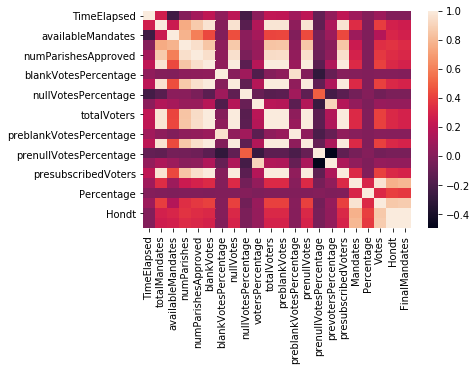

In [22]:
# checking correlation using heatmap

dfcor=df.corr()
sns.heatmap(dfcor)

these columns are correlated to each other - totalMandates  , availableMandates , numParishes ,            
numParishesApproved , blankVotes , nullVotes , preblankVotes , prenullVotes , presubscribedVoters , pretotalVoters

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19492 entries, 0 to 19491
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeElapsed              19492 non-null  int64  
 1   time                     19492 non-null  object 
 2   territoryName            19492 non-null  object 
 3   totalMandates            19492 non-null  int64  
 4   availableMandates        19492 non-null  int64  
 5   numParishes              19492 non-null  int64  
 6   numParishesApproved      19492 non-null  int64  
 7   blankVotes               19492 non-null  int64  
 8   blankVotesPercentage     19492 non-null  float64
 9   nullVotes                19492 non-null  int64  
 10  nullVotesPercentage      19492 non-null  float64
 11  votersPercentage         19492 non-null  float64
 12  subscribedVoters         19492 non-null  object 
 13  totalVoters              19491 non-null  float64
 14  preblankVotes         

In [24]:
# lets check for skewness 
df.skew()

TimeElapsed                -0.005586
totalMandates               5.336090
availableMandates           4.866122
numParishes                 3.903704
numParishesApproved         4.253184
blankVotes                  4.600903
blankVotesPercentage        0.077738
nullVotes                   4.595847
nullVotesPercentage         0.846710
votersPercentage           -1.150871
totalVoters                 4.632565
preblankVotes               4.636444
preblankVotesPercentage     0.037168
prenullVotes                4.643169
prenullVotesPercentage      1.198112
prevotersPercentage        -0.765792
presubscribedVoters         4.648461
Mandates                   17.121335
Percentage                  2.545575
Votes                      14.190572
Hondt                      11.469376
FinalMandates              12.367832
dtype: float64

In [34]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['totalMandates', 'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes','nullVotes']  # need to use columns_names for pandas & for numpy use range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])  # if numpy instead of pandas use X[:, column] instead

column name - numParishes , blankVotesPercentage , nullVotesPercentage , votersPercentage having outliers 

In [35]:
import pandas as pd

feature_cols = ['totalMandates', 'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes','nullVotes']

X = df[feature_cols]
y = df.totalMandates

Applying linear regression with limited columns having correlation between them

In [36]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(19492, 6)


In [37]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(19492,)


In [38]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14619, 6)
(4873, 6)
(14619,)
(4873,)


In [39]:
# Linear regression in scikit-learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# Interpreting model coefficients
# print the intercept and coefficients

print(linreg.intercept_)
print(linreg.coef_)

-3.028688411177427e-13
[ 1.00000000e+00 -3.05741026e-16  8.31258721e-16 -2.06901573e-16
  1.06001534e-16 -6.71381745e-17]


In [41]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [42]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# load the datasets
dataset = df

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)    
print(grid)

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
1.0
0.001


In [43]:
# Randomized Search for Algorithm Tuning

import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# load the datasets
dataset = df

# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}

# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train) 
print(rsearch)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000208C542F588>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
1.0
0.00013161707817133106


In [44]:
# calculate MAE using scikit-learn
from sklearn import metrics

# Computing the MAE
print("Mean Accuracy Error: ",metrics.mean_absolute_error(y_test, y_pred))

# Computing the MSE
print("Mean Sqr Error:   ",metrics.mean_squared_error(y_test, y_pred))

# Computing the RMSE
print("Root mean sqr error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Accuracy Error:  2.9738526697773424e-13
Mean Sqr Error:    2.1674521796024455e-25
Root mean sqr error:  4.655590381039171e-13


In [45]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

# Split data using train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.30)

max_rscore=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size=0.30)
    regrn = linear_model.LinearRegression()
    regrn.fit(X_train,y_train)
    y_pred = regrn.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)

max r2 score corresponds to 42  is  1.0


In [46]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split

# we can officially put values as 0.001,0.01,0.1,1.0 for alpha

# will reduce the coefficient to zero (those feature are not informative)
# Default value of alpha = 1.0
# alpha =0.01

ls=Lasso(alpha=1.0)
ls.fit(X_train,y_train) 
ls.score(X_train,y_train)

train_score=ls.score(X_train, y_train)
test_score=ls.score(X_test, y_test)

ls.coef_

print ("linear lasso train score:", train_score)
print ("linear lasso test score:", test_score)

linear lasso train score: 0.9998131817032871
linear lasso test score: 0.999812791573403


In [47]:
# check if shape mismatch error thrown then check value of feature_names,coef ,both valu should be same only
# try to minimize coe variable

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

rd=Ridge(alpha=0.001)
rd.fit(X_train,y_train) 
rd.score(X_train,y_train)


Ridge_train_score=ls.score(X_train, y_train)
Ridge_test_score=ls.score(X_test, y_test)

ls.coef_

print ("Ridge train score:", Ridge_train_score)
print ("Ridge test score:", Ridge_test_score)

Ridge train score: 0.9998131817032871
Ridge test score: 0.999812791573403


In [48]:
# check if shape mismatch error thrown then check value of feature_names,coef ,both valu should be same only
# try to minimize coe variable

# ElasticNet is a combination of both Lasso & Ridge

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

enr=ElasticNet(alpha=0.001)
enr=ElasticNet()
enr.fit(X_train,y_train)


El_train_score=ls.score(X_train, y_train)
El_test_score=ls.score(X_test, y_test)

ls.coef_

print ("EL train score:", El_train_score)
print ("EL test score:", El_test_score)

EL train score: 0.9998131817032871
EL test score: 0.999812791573403


In [49]:
from sklearn.externals import joblib

joblib_file = "joblib_regrn.pkl"             # Save to file in the current working directory
joblib.dump(regrn, joblib_file)
joblib_regrn = joblib.load(joblib_file)      # Load from file
score = joblib_regrn.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for linear regression: {0:.2f} %".format(100 * score))

Test score for linear regression: 100.00 %


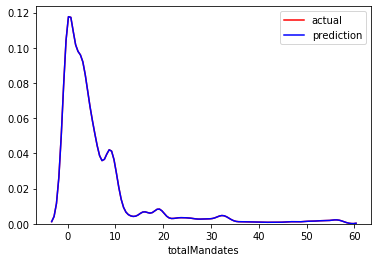

In [50]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

Conclusion-Portugal Election dataset gives 100% scorte for linear regression.